##Get Libraries

In [16]:
# https://www.solarreviews.com/blog/how-much-does-a-3kw-solar-power-system-cost-and-how-much-electricity-does-it-produce

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial

##Set the Data

In [2]:
production_array = [143.825/30, 131.78/30, 103.46/30] #kWh/month/m^2 - converted to day

demand_array = [900/30, 700/30, 650/30]  #kWh/month - converted to day

price_array = [.2550, .0944, .0944] #cents/kWh

square_meter_of_panel_price = 646

alpha = 12

##Define Functions

In [3]:
def h(x):
  if x > 0:
    return 1
  if x <= 0:
    return 0

In [6]:
def seasonCostSummation(theta, index, seasonLength):

  Yn = 0
  j_theta = 0
  b = -.045

  numberOfSquareMeters = (1/(1 + np.exp(b*theta/square_meter_of_panel_price))-.5)
  generated_beta = production_array[index]/gamma(1+1/alpha)*25
  demand_beta = demand_array[index]/gamma(1+1/alpha)
  price_beta = price_array[index]/gamma(1+1/alpha)
  
  for i in range(0,seasonLength):

    generated = np.random.weibull(alpha)*generated_beta
    total_generated = generated*numberOfSquareMeters
    demand = np.random.weibull(alpha)*demand_beta
    buying_price = np.random.weibull(alpha)*price_beta
    selling_price = buying_price*0.8

    sigmoid = numberOfSquareMeters
    max = -buying_price * h(demand - total_generated)
    min = +selling_price * h(total_generated - demand)

    Yn += (1-sigmoid)*total_generated*(max+min)

    if demand > total_generated:
      j_theta += (demand - total_generated)*buying_price
    else:
      j_theta += (demand - total_generated)*selling_price

    return Yn, j_theta

##Yn

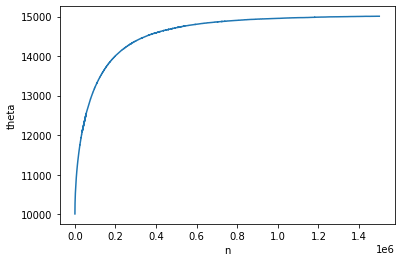

15009.288349333612
15009.042928192222


In [17]:
#experiment with inital theta starting lower

theta = 10000
thetaN = 0

n = 0

ns = []
thetas = []

while n < 1500000:

  if n > 0:
    theta = thetaN
    
  n+=1
  en = 1/math.sqrt(n)

  summerYn, summerJ_theta = seasonCostSummation(theta, 0, 122)
  fallSpringYn, fallSpringJ_theta = seasonCostSummation(theta,1, 153)
  winterYn, winterJ_theta = seasonCostSummation(theta, 2, 90)

  Yn = -summerYn-fallSpringYn-winterYn-1
  thetaN = theta + en*Yn

  ns.append(n)
  thetas.append(thetaN)

plt.plot(ns, thetas)
plt.xlabel('n')
plt.ylabel('theta')
plt.show()

end_cost = thetaN + summerJ_theta+fallSpringJ_theta+winterJ_theta

print(end_cost)
print(thetaN)

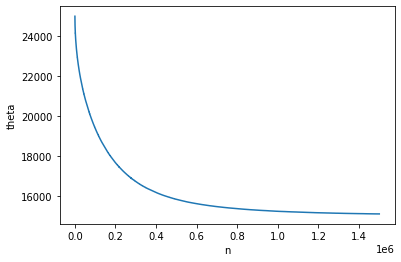

15106.616944513595
15103.895556588819


In [18]:
#experiment with inital theta starting higher

theta = 25000
thetaN = 0

n = 0

ns = []
thetas = []

while n < 1500000:

  if n > 0:
    theta = thetaN
    
  n+=1
  en = 1/math.sqrt(n)

  summerYn, summerJ_theta = seasonCostSummation(theta, 0, 122)
  fallSpringYn, fallSpringJ_theta = seasonCostSummation(theta,1, 153)
  winterYn, winterJ_theta = seasonCostSummation(theta, 2, 90)

  Yn = -summerYn-fallSpringYn-winterYn-1
  thetaN = theta + en*Yn

  ns.append(n)
  thetas.append(thetaN)

plt.plot(ns, thetas)
plt.xlabel('n')
plt.ylabel('theta')
plt.show()

end_cost = thetaN + summerJ_theta+fallSpringJ_theta+winterJ_theta

print(end_cost)
print(thetaN)

In [26]:
end_cost-thetaN

2.7213879247756267

##Confidence Interval of 95%

In [23]:
yns = []
theta = 15000

for x in range(0,1000):

  summerYn, summerJ_theta = seasonCostSummation(theta, 0, 122)
  fallSpringYn, fallSpringJ_theta = seasonCostSummation(theta,1, 153)
  winterYn, winterJ_theta = seasonCostSummation(theta, 2, 90)

  Yn = -summerYn-fallSpringYn-winterYn-1

  yns.append(Yn)

mean = sum(yns)/len(yns)

total = 0
for yn in yns:
  total += (yn-mean)**2

n = len(yns)
variance = total*(1/(n*(n-1)))

convergence_min = mean - 1.96*math.sqrt(variance)
convergence_max = mean + 1.96*math.sqrt(variance)

print(convergence_min)
print(convergence_max)

-0.2547376200069714
0.399819759020979


##Deterministic, making sure data/methods are correct

In [20]:
#total generated = wiebull with scale of sigma depending on theta
#logic = number of square meters depends on theta - linearly, exposure = rv wiebul, captured = sigmoid
#we did = generated = wiebul, number of square meters = sigmoid, since it is simpler

x_theta is a sigmoid function of theta


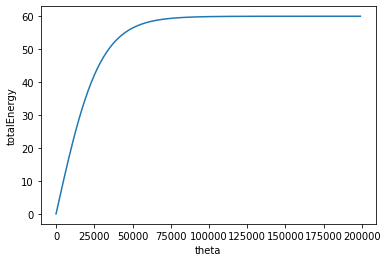

As theta goes up, we generate more exceeding our demand, increasing the difference between x_theta and demand


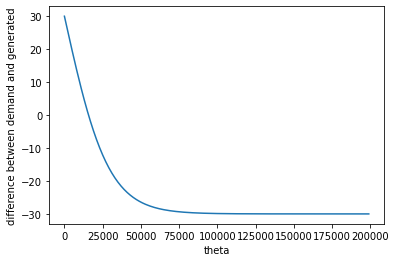

When theta is too small, we need to purchase energy so cost is up, when theta is too big, we sell energy so cost is negative


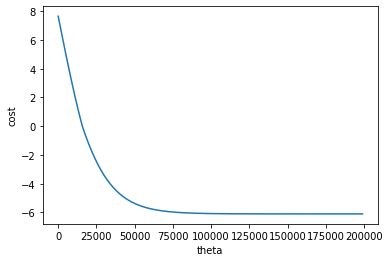

In [21]:
#plotting

index = 0

b = -.045 #shape - how steep

thetas = []
totalEnergy = []
difference = []
costs = []

for theta in range(0,200000,1000):

  generated = production_array[index]
  # mean = beta*gamma(1+1/alpha)
  numberOfSquareMeters = (1/(1 + np.exp(b*theta/square_meter_of_panel_price))-.5)*25
  x_theta = generated*numberOfSquareMeters

  demand = demand_array[index]
  # diff = abs(x_theta-demand)
  diff = demand-x_theta #if we invest more, we generate more than demand
  if diff > 0:
    cost = diff*price_array[index]
  else:
    cost = diff*price_array[index]*0.8

  thetas.append(theta)
  totalEnergy.append(x_theta)
  difference.append(diff)
  costs.append(cost)

print('x_theta is a sigmoid function of theta')
plt.plot(thetas, totalEnergy)
plt.xlabel('theta')
plt.ylabel('totalEnergy')
plt.show()

print('As theta goes up, we generate more exceeding our demand, increasing the difference between x_theta and demand')
plt.plot(thetas, difference)
plt.xlabel('theta')
plt.ylabel('difference between demand and generated')
plt.show()

print('When theta is too small, we need to purchase energy so cost is up, when theta is too big, we sell energy so cost is negative')
plt.plot(thetas, costs)
plt.xlabel('theta')
plt.ylabel('cost')
plt.show()

In [24]:
#manual - data checking

index = 0

# theta = 0
# theta =8580
theta = 15000
# theta = 100000

b = -.045

print('Season Production/m^2 ', production_array[index])
print('Season Demand ', demand_array[index])
print('Season Price ', price_array[index])

generated = production_array[index]
numberOfSquareMeters = (1/(1 + np.exp(b*theta/square_meter_of_panel_price))-.5)*25
x_theta = generated*numberOfSquareMeters
  
demand = demand_array[index]
diff = demand-x_theta
if diff > 0:
  cost = diff*price_array[index]
else:
  cost = diff*price_array[index]*0.8

print()
print('Theta ', theta)
print('Generated ', x_theta)
print('Difference ', diff)
print('Cost ', cost)

Season Production/m^2  4.7941666666666665
Season Demand  30.0
Season Price  0.255

Theta  15000
Generated  28.74016000096585
Difference  1.2598399990341491
Cost  0.32125919975370804
